In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Before we design the query, we want to find out how many dates are in our DB, what is the earliest and latest date in our DB
session.query(func.count(Measurement.date)).all()

[(19550)]

In [11]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [12]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [13]:
#The last 12 months. Since we already know that the latest date is '2017-08-23', we can filter it to ">='2016-08-23'"
session.query(Measurement.date).\
    filter(Measurement.date >='2016-08-23').\
    order_by(Measurement.date).all()

[('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-23'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'

In [14]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [15]:
# Perform a query to retrieve the data and precipitation scores
# We alrdeay have it filtered by date, we just have to add the precipitation for that period of time
one_year_query = session.query(Measurement.date,Measurement.prcp ).\
    filter(Measurement.date >='2016-08-23').\
    order_by(Measurement.date).all()
one_year_query

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# First we will create the Data Frame
prcp_df = pd.DataFrame(one_year_query, columns= ["Date", "Precipitation"])
prcp_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [17]:
# We need to set the index to "Date" column
prcp_df.set_index("Date", inplace = True)
prcp_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [18]:
# Sort the dataframe by date
sorted_df = prcp_df.sort_values(by= "Date", ascending = True)
sorted_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


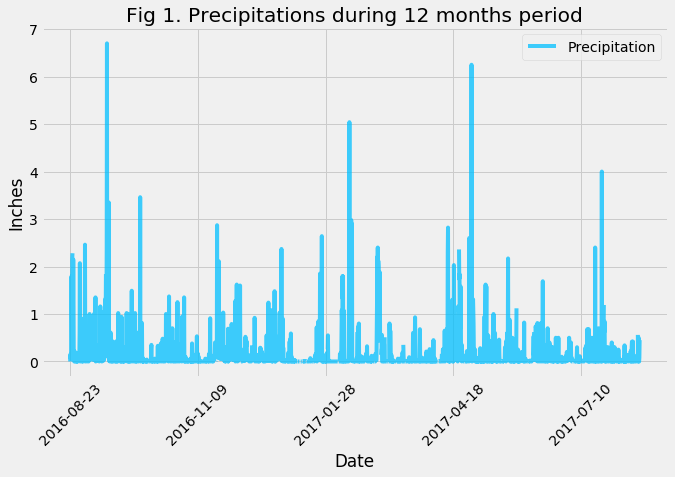

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title = "Fig 1. Precipitations during 12 months period",rot=45,color='deepskyblue', alpha=0.75, figsize=(10,6))
plt.legend(loc='upper right')
plt.ylabel("Inches")
plt.xlabel("Date")
plt.savefig("..//Figures/Fig1.png", bbox_inches='tight')
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
station_query = session.query(Measurement.station).distinct().count()
# station_query
print(f"There are {station_query} stations available in this data set")

There are 9 stations available in this data set


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, 
                                func.count(Measurement.station)).\
                                group_by(Measurement.station).\
                                order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Most active station
most_active_station = most_active_stations [0][0]
# most_active_station
print(f"Station {most_active_station} has the most activity")

Station USC00519281 has the most activity


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min_temp_query = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
# min_temp_query
max_temp_query = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
# max_temp_query
avg_temp_query = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
# avg_temp_query
print(f"The lowest temperature recorded at station USC00519281 was {min_temp_query} degrees F")
print(f"The highest temperature recorded at station USC00519281 was {max_temp_query} degrees F")
print(f"The average temperature recorded at station USC00519281 was {avg_temp_query} degrees F")

The lowest temperature recorded at station USC00519281 was [(54.0,)] degrees F
The highest temperature recorded at station USC00519281 was [(85.0,)] degrees F
The average temperature recorded at station USC00519281 was [(71.66378066378067,)] degrees F


In [25]:
# Choose the station with the highest number of temperature observations.
highest_tmps_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
# highest_tmps_station
print(f"Station {highest_tmps_station} has the highest number of emperature observations ")

Station ('USC00519281', 2772) has the highest number of emperature observations 


In [26]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_temp_query = session.query(Measurement.tobs).\
    filter(Measurement.date >='2016-08-23').\
    order_by(Measurement.tobs).all()
one_year_temp_query

[(58.0),
 (59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (60.0),
 (60.0),
 (60.0),
 (60.0),
 (61.0),
 (61.0),
 (61.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 

In [27]:
#add the date in a data frame
temp_df = pd.DataFrame(one_year_temp_query, columns= ["Temperature"])
temp_df

,Temperature
0,58.0
1,59.0
2,59.0
3,59.0
4,60.0
...,...
2225,84.0
2226,84.0
2227,85.0
2228,87.0


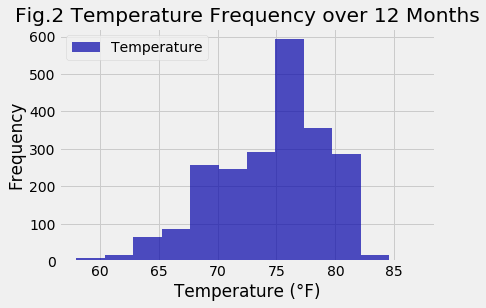

In [54]:
#create the histogram
temp_df.plot.hist(bins=12, color="#0504aa",alpha=0.7, title="Fig.2 Temperature Frequency over 12 Months")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.savefig("..//Figures/Fig2.png", bbox_inches='tight')
plt.show()